In [1]:
import tensorflow as tf
from datetime import datetime

In [8]:
x = tf.ones([1,1,1])

In [14]:
tf.shape(x)[0]

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [10]:
shape = [2,2]
embed_dim = [784]

In [63]:
%timeit tf.concat([[tf.shape(x)[0]], [tf.constant(-1)]], axis = 0)

203 µs ± 1.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [48]:
%timeit tf.concat([tf.shape(x)[0], tf.constant(-1)], axis = 0)

108 µs ± 550 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [62]:
%timeit tf.concat([tf.expand_dims(tf.shape(x)[0],0), tf.expand_dims(tf.constant(-1),0)], axis = 0)

124 µs ± 224 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, -1], dtype=int32)>

In [76]:
@tf.function
def test():
   return tf.concat([tf.shape(x)[0], tf.constant(-1)], axis = 0)
test()

ValueError: in user code:

    <ipython-input-76-751fd255fd39>:3 test  *
        return tf.concat([tf.shape(x)[0], tf.constant(-1)], axis = 0)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:180 wrapper  **
        return target(*args, **kwargs)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:1606 concat
        return gen_array_ops.concat_v2(values=values, axis=axis, name=name)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py:1189 concat_v2
        "ConcatV2", values=values, axis=axis, name=name)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3327 _create_op_internal
        op_def=op_def)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1817 __init__
        control_input_ops, op_def)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1657 _create_c_op
        raise ValueError(str(e))

    ValueError: Can't concatenate scalars (use tf.stack instead) for '{{node concat}} = ConcatV2[N=2, T=DT_INT32, Tidx=DT_INT32](strided_slice, Const, concat/axis)' with input shapes: [], [], [].


In [77]:
tf.function(lambda: tf.concat([tf.expand_dims(tf.shape(x)[0],0), tf.constant(-1, shape = (1,))], axis = 0))()

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, -1], dtype=int32)>

In [71]:
tf.function(lambda :tf.concat([tf.shape(x)[0], tf.constant(2)], axis = 0))()

ValueError: in user code:

    <ipython-input-68-100b3fcf1be8>:1 None  *
        tf.function(lambda :tf.concat([tf.shape(x)[0], tf.constant(2)], axis = 0))()
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:180 wrapper  **
        return target(*args, **kwargs)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:1606 concat
        return gen_array_ops.concat_v2(values=values, axis=axis, name=name)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py:1189 concat_v2
        "ConcatV2", values=values, axis=axis, name=name)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3327 _create_op_internal
        op_def=op_def)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1817 __init__
        control_input_ops, op_def)
    /home/dm1/miniconda3/envs/memory_gpu/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1657 _create_c_op
        raise ValueError(str(e))

    ValueError: Can't concatenate scalars (use tf.stack instead) for '{{node concat}} = ConcatV2[N=2, T=DT_INT32, Tidx=DT_INT32](strided_slice, Const, concat/axis)' with input shapes: [], [], [].


In [61]:

y = tf.constant(-1)
tf.expand_dims(y, 0)
#tf.reshape(y, shape = tf.concat([[tf.constant(1)], tf.shape(x)], axis = 0))

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([-1], dtype=int32)>

In [ ]:
tf.concat([tf.expand_dims(tf.shape(x)[0], shape = [], tf.constant(-1)], axis = 0)

In [49]:
tf.concat([[tf.shape(x)[0]], [tf.constant(-1)]], axis = 0)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, -1], dtype=int32)>

In [50]:
tf.concat([tf.shape(x)[0], tf.constant(-1)], axis = 0)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, -1], dtype=int32)>

In [23]:
tf.concat([tf.constant(embed_dim), [tf.shape(x)[0]], tf.ones([3], dtype = tf.int32)], axis = 0)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([784,   1,   1,   1,   1], dtype=int32)>

In [44]:
tf.constant([x.shape[0], -1])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, -1], dtype=int32)>

In [1]:
import tensorflow as tf

In [3]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [2]:
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
a =  tf.ones([4], dtype = tf.int32)

In [ ]:
import tensorflow as tf


In [2]:
%tensorboard --logdir logs


UsageError: Line magic function `%tensorboard` not found.


In [1]:
!kill 42343

/bin/bash: line 0: kill: (42343) - No such process


In [18]:
tracing_test(tf.constant([4,10,10]))

Tracing with  Tensor("x:0", shape=(3,), dtype=int32)


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 2., 2.], dtype=float32)>

In [25]:
graph = tracing_test.get_concrete_function(tf.ones([10])).graph

Tracing with  Tensor("x:0", shape=(10,), dtype=float32)


In [26]:
for node in graph.as_graph_def().node:
  print(f'{node.input} -> {node.name}')

[] -> x
[] -> ones
[] -> mul/y
['ones', 'mul/y'] -> mul
['mul'] -> Identity


In [ ]:
%tensorboard --logdir logs


In [11]:
import tensorflow as tf
import tf_slim as slim
import sys

In [12]:
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
#print(x_train.dtype)

In [13]:
print(sys.getsizeof(x_train)/1024.0/1024.0)

44.8609619140625


In [23]:
tf.compat.v1.disable_eager_execution()
x_train = tf.cast(tf.reshape(x_train, (x_train.shape[0], -1)),
                    dtype=tf.float32) / 255
map = tf.ones([30,30,784], dtype = tf.float32)
diffs1 = tf.ones([2000,30,30,784], dtype = tf.float32)
diffs2 = tf.reshape(diffs, shape = [2000,1,30,30,784])

slim.model_analyzer.analyze_vars([x_train, map, diffs1,diffs2], print_info=True)

---------
Variables: name (type shape) [size]
---------
truediv_5:0 (float32 60000x784) [47040000, bytes: 188160000]
ones_8:0 (float32 30x30x784) [705600, bytes: 2822400]
ones_9:0 (float32 2000x30x30x784) [1411200000, bytes: 5644800000]
Reshape_8:0 (float32 2000x1x30x30x784) [1411200000, bytes: 5644800000]
Total size of variables: 2870145600
Total bytes of variables: 11480582400


(2870145600, 11480582400)

In [24]:
id(diffs1)

139722270323088

In [25]:
id(diffs2)

139722270325712

In [20]:
5644800000/1024.0/1024.0

5383.30078125

In [19]:
188160000/1024.0/1024.0

179.443359375

In [4]:
import tensorflow as tf
import numpy as np

In [7]:
x = tf.random.normal([10,10, 784], dtype = tf.float16)

In [12]:
tf.shape(x)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 10,  10, 784], dtype=int32)>

In [15]:
x = tf.constant([])

AttributeError: module 'tensorflow._api.v2.raw_ops' has no attribute 'pack'

In [13]:
tf.reshape(x, [1,100,28,28])

<tf.Tensor: shape=(1, 100, 28, 28), dtype=float16, numpy=
array([[[[ 5.2637e-01, -2.3730e+00,  1.8232e+00, ..., -1.0342e+00,
           3.7720e-01, -1.0371e+00],
         [ 2.2690e-02, -1.9946e-01,  2.7393e-01, ...,  5.5762e-01,
           9.8511e-02,  1.9355e+00],
         [ 9.9316e-01,  1.3721e+00, -7.4402e-02, ..., -1.5889e+00,
          -6.7969e-01, -1.5908e+00],
         ...,
         [-1.0352e+00,  1.1377e+00, -2.0544e-01, ..., -1.1836e+00,
          -9.1211e-01,  2.9272e-01],
         [-8.9539e-02,  3.9966e-01,  4.1406e-01, ..., -2.8979e-01,
           1.2070e+00, -1.2402e-01],
         [ 1.0713e+00, -2.0248e-02, -1.2451e-01, ...,  4.8096e-01,
           5.6274e-02,  5.5078e-01]],

        [[ 1.4966e-01,  2.6270e+00, -4.1504e-01, ...,  9.4434e-01,
          -3.6328e-01,  9.1406e-01],
         [-6.9238e-01,  9.3848e-01, -2.1738e+00, ..., -2.0523e-02,
           6.6309e-01, -7.6758e-01],
         [ 1.6826e+00,  8.1104e-01,  3.7354e-01, ..., -8.8379e-01,
           1.2617e+00,  2.4

In [24]:
from neural_map import *
import tensorflow as tf
import collections
import numpy as np
# For test script imports
import matplotlib.pyplot as plt
import time
import cProfile
from tensorflow.python.keras.backend import dtype
from datetime import datetime
from packaging import version
from PIL import Image

In [26]:
# Set up logging and Tracing.

#tf.profiler.experimental.start('logs/neural_map_v1/profile')

# Fetch Dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = tf.cast(tf.reshape(x_train, (x_train.shape[0], -1)),
                    dtype=tf.float16) / 255
# Feed unsupervised average to initialize
#data_avg = tf.reduce_mean(x_train, axis=0)
#print('data_avg: ', data_avg.shape)

# Call only one tf.function when tracing.
shape = [10, 10]
iterations = 5
batch_size = 2000
neural_map = NeuralMap(
    shape=shape,
    embed_dim=[784],
    dtype=tf.float16,
    alpha=(3.0 / 5.0 *
            iterations),  # how quickly the neighborhood region shrinks.
    sigma_0=15,  # max size of the neighborhood region 
    eta_0=0.3,
    map_init=None)
# Data
train_ds = tf.data.Dataset.from_tensor_slices(x_train).shuffle(
    buffer_size=3 * batch_size).batch(batch_size)
# Metrics
kl_loss = tf.keras.metrics.Mean()
distortion = tf.keras.metrics.Mean()

# Logging material here
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = 'logs/neural_map_v1/%s' % stamp
writer = tf.summary.create_file_writer(logdir)
tf.summary.trace_on(graph=True, profiler=True)

training_loop(neural_map, train_ds, kl_loss, distortion, iterations)


Creating SOM of shape ListWrapper([10, 10]) with weight dimension ListWrapper([784])
========= Batch 0 ======= KL_Loss: 3.52263451e-05 Distortion: 0.00127601624
========= Batch 1 ======= KL_Loss: 5.47766685e-05 Distortion: 0.000591278076
========= Batch 2 ======= KL_Loss: 8.06450844e-05 Distortion: 0.000274419785
========= Batch 3 ======= KL_Loss: 9.40561295e-05 Distortion: 0.00011920929
========= Batch 4 ======= KL_Loss: 0.000115334988 Distortion: 5.81741333e-05
========= Batch 5 ======= KL_Loss: 0.000116407871 Distortion: 1.87158585e-05
========= Batch 6 ======= KL_Loss: 0.000108957291 Distortion: -6.55651093e-07
========= Batch 7 ======= KL_Loss: 0.000145435333 Distortion: 1.9133091e-05
========= Batch 8 ======= KL_Loss: 0.000149011612 Distortion: -2.86102295e-06
========= Batch 9 ======= KL_Loss: 0.000111341476 Distortion: -2.74181366e-06
========= Batch 10 ======= KL_Loss: 0.000141859055 Distortion: -7.15255737e-07
========= Batch 11 ======= KL_Loss: 0.000148773193 Distortion: -1.

In [80]:
x = tf.cast(neural_map.SOM, dtype = tf.float32)

In [81]:
a = tf.reshape(x, [100,28, 28])

In [83]:
split = tf.unstack(a, axis = 0)

In [86]:
tf.concat(tf.unstack(a, axis = 0), axis = 1)

<tf.Tensor: shape=(28, 2800), dtype=float32, numpy=
array([[ 5.9604645e-08, -5.9604645e-08, -5.9604645e-08, ...,
        -5.9604645e-08,  5.9604645e-08,  5.9604645e-08],
       [ 5.9604645e-08, -5.9604645e-08,  5.9604645e-08, ...,
        -5.9604645e-08, -5.9604645e-08, -5.9604645e-08],
       [ 5.9604645e-08,  5.9604645e-08,  5.9604645e-08, ...,
         3.0994415e-06, -5.9604645e-08, -5.9604645e-08],
       ...,
       [-5.9604645e-08,  5.9604645e-08,  2.1815300e-05, ...,
         2.9444695e-05,  5.9604645e-08,  5.9604645e-08],
       [ 5.9604645e-08,  5.9604645e-08, -5.9604645e-08, ...,
         1.7881393e-07, -5.9604645e-08,  5.9604645e-08],
       [ 5.9604645e-08, -5.9604645e-08,  5.9604645e-08, ...,
         5.9604645e-08, -5.9604645e-08,  5.9604645e-08]], dtype=float32)>

In [60]:
a.shape

TensorShape([100, 28, 28])

In [56]:
b = tf.concat(a, axis  = 2)

In [52]:
b.shape

TensorShape([10, 10, 28, 28])

In [ ]:
a = tf.reshape(a, [10])

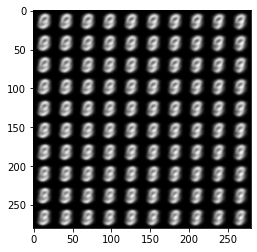

In [140]:
plt.imshow(tensor_to_grid(y).numpy(), cmap = 'gray')

In [92]:
test = tf.constant([1,2,3,4,5,6,7,8,9,10,11, 12,13,14,15,16])

In [99]:
q = tf.reshape(test, [2,2,2,2])

In [102]:
q

<tf.Tensor: shape=(2, 2, 2, 2), dtype=int32, numpy=
array([[[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]]],


       [[[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]]], dtype=int32)>

In [105]:
rows = tf.unstack(q, axis = 0)

rows

In [112]:
concat_across_x = [tf.concat(tf.unstack(x, axis = 0),axis=1) for x in rows]

In [113]:
concat_across_x

[<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
 array([[1, 2, 5, 6],
        [3, 4, 7, 8]], dtype=int32)>,
 <tf.Tensor: shape=(2, 4), dtype=int32, numpy=
 array([[ 9, 10, 13, 14],
        [11, 12, 15, 16]], dtype=int32)>]

In [114]:
tf.concat(concat_across_x, axis = 0)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 1,  2,  5,  6],
       [ 3,  4,  7,  8],
       [ 9, 10, 13, 14],
       [11, 12, 15, 16]], dtype=int32)>

In [116]:
def tensor_to_grid(x):
    '''Shape x: [X,Y, D1,D2,D3,D4]
    '''
    rows = tf.unstack(x, axis = 0)
    concat_across_x = [tf.concat(tf.unstack(x, axis = 0),axis=1) for x in rows]
    return tf.concat(concat_across_x, axis = 0)

In [126]:
y = tf.reshape(x, [10,10,28,28])

In [129]:
rows = tf.unstack(y, axis = 0)


In [ ]:

tf.pad()

In [130]:
concat_across_x = [tf.concat(tf.unstack(x, axis = 0),axis=1) for x in rows]


In [132]:
grid = tf.concat(concat_across_x, axis = 0)

In [136]:
tf.shape(grid)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([280, 280], dtype=int32)>

In [138]:
tf.concat([tf.constant([1]), tf.shape(grid), tf.constant([1])], axis = 0)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  1, 280, 280,   1], dtype=int32)>

In [139]:
tf.reshape(grid, shape = tf.concat([tf.constant([1]), tf.shape(grid), tf.constant([1])], axis = 0)) 

<tf.Tensor: shape=(1, 280, 280, 1), dtype=float32, numpy=
array([[[[ 5.9604645e-08],
         [-5.9604645e-08],
         [-5.9604645e-08],
         ...,
         [-5.9604645e-08],
         [-5.9604645e-08],
         [-5.9604645e-08]],

        [[ 5.9604645e-08],
         [-5.9604645e-08],
         [ 5.9604645e-08],
         ...,
         [-5.9604645e-08],
         [-5.9604645e-08],
         [ 5.9604645e-08]],

        [[ 5.9604645e-08],
         [ 5.9604645e-08],
         [ 5.9604645e-08],
         ...,
         [ 3.3974648e-06],
         [-5.9604645e-08],
         [-5.9604645e-08]],

        ...,

        [[ 5.9604645e-08],
         [-5.9604645e-08],
         [ 2.1338463e-05],
         ...,
         [ 2.9444695e-05],
         [ 5.9604645e-08],
         [ 5.9604645e-08]],

        [[ 5.9604645e-08],
         [ 5.9604645e-08],
         [ 5.9604645e-08],
         ...,
         [ 1.7881393e-07],
         [-5.9604645e-08],
         [ 5.9604645e-08]],

        [[-5.9604645e-08],
         [ 

In [ ]:
concat_across_x = [tf.concat(tf.unstack(x, axis = 0),axis=1) for x in rows]
return tf.concat(concat_across_x, axis = 0)

In [104]:
tf.concat(tf.unstack(q, axis = 0), axis = 2)

<tf.Tensor: shape=(2, 2, 4), dtype=int32, numpy=
array([[[ 1,  2,  9, 10],
        [ 3,  4, 11, 12]],

       [[ 5,  6, 13, 14],
        [ 7,  8, 15, 16]]], dtype=int32)>

In [171]:
rows = tf.unstack(x, axis=0)
concat_across_x = [tf.concat(tf.unstack(x, axis=0), axis=1) for x in rows]
tf.concat(concat_across_x, axis=0)

<tf.Tensor: shape=(280, 280), dtype=float16, numpy=
array([[ 5.960e-08, -5.960e-08, -5.960e-08, ..., -5.960e-08, -5.960e-08,
        -5.960e-08],
       [ 5.960e-08, -5.960e-08,  5.960e-08, ..., -5.960e-08, -5.960e-08,
         5.960e-08],
       [ 5.960e-08,  5.960e-08,  5.960e-08, ...,  3.397e-06, -5.960e-08,
        -5.960e-08],
       ...,
       [ 5.960e-08, -5.960e-08,  2.134e-05, ...,  2.944e-05,  5.960e-08,
         5.960e-08],
       [ 5.960e-08,  5.960e-08,  5.960e-08, ...,  1.788e-07, -5.960e-08,
         5.960e-08],
       [-5.960e-08,  5.960e-08, -5.960e-08, ...,  5.960e-08, -5.960e-08,
         5.960e-08]], dtype=float16)>

In [180]:
q

<tf.Tensor: shape=(2, 2, 2, 2), dtype=int32, numpy=
array([[[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]]],


       [[[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]]], dtype=int32)>

In [179]:
tf.unstack(tf.unstack(q, axis=0), axis = 0)

[<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
 array([[[1, 2],
         [3, 4]],
 
        [[5, 6],
         [7, 8]]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
 array([[[ 9, 10],
         [11, 12]],
 
        [[13, 14],
         [15, 16]]], dtype=int32)>]

In [177]:
rows = tf.unstack(x, axis=0)
concat_across_x = tf.concat(tf.unstack(tf.unstack(x, axis=0), axis=0), axis=1)
tf.concat(concat_across_x, axis=0)

<tf.Tensor: shape=(10, 280, 28), dtype=float16, numpy=
array([[[ 5.960e-08, -5.960e-08, -5.960e-08, ..., -5.960e-08,
         -5.960e-08,  5.960e-08],
        [ 5.960e-08, -5.960e-08,  5.960e-08, ...,  5.960e-08,
          5.960e-08, -5.960e-08],
        [ 5.960e-08,  5.960e-08,  5.960e-08, ...,  6.080e-06,
          5.960e-08, -5.960e-08],
        ...,
        [ 5.960e-08, -5.960e-08,  2.134e-05, ...,  2.140e-05,
          5.960e-08, -5.960e-08],
        [ 5.960e-08,  5.960e-08,  5.960e-08, ...,  1.788e-07,
          5.960e-08,  5.960e-08],
        [-5.960e-08,  5.960e-08, -5.960e-08, ..., -5.960e-08,
          5.960e-08, -5.960e-08]],

       [[ 5.960e-08,  5.960e-08, -5.960e-08, ...,  5.960e-08,
          5.960e-08, -5.960e-08],
        [ 5.960e-08, -5.960e-08, -5.960e-08, ..., -5.960e-08,
         -5.960e-08,  5.960e-08],
        [ 5.960e-08, -5.960e-08,  5.960e-08, ...,  5.305e-06,
          5.960e-08, -5.960e-08],
        ...,
        [ 5.960e-08, -5.960e-08,  2.235e-05, ...,  2.

In [ ]:
def unstack_pad_concat(x):
    eles = tf.unstack(x, axis=0)
    
    tf.concat(, axis=1)

In [149]:
def tensor_to_grid(x, padding):
    '''Input Shape x: [X,Y,D1,D2,D3,D4]
    '''
    rows = tf.unstack(x, axis=0)
    concat_across_x = [tf.concat(tf.pad(tf.unstack(x, axis=0), padding), axis=1) for x in rows]
    return tf.concat(concat_across_x, axis=0)


def som_to_grid(neural_map, pad = 5):
    img_size = int(np.sqrt(neural_map.embed_dim))
    padding = [[pad, pad], [pad,pad]]
    grid = tensor_to_grid(
        tf.reshape(neural_map.SOM,
                   shape=[
                       neural_map.shape[0], neural_map.shape[1], img_size,
                       img_size
                   ]), padding = padding)
    return tf.reshape(grid,
                      shape=tf.concat(
                          [
                           tf.shape(grid),
                           tf.constant([1])],
                          axis=0))

In [150]:
plt.imshow(tf.cast(som_to_grid(neural_map), dtype = tf.float32), cmap = 'gray')

InvalidArgumentError: The first dimension of paddings must be the rank of inputs[2,2] [10,28,28] [Op:Pad]

In [3]:
import tensorflow as tf
a = tf.Variable(tf.ones([2,2,2],dtype = tf.float32))

In [20]:
class C():
    def __init__(self, **kwargs):
        super(C, self).__init__(**kwargs)
        self.step = tf.Variable(1)
    def increment(self):
        self.step.assign_add(1)
    def method(self):
        step = self.step
        print('PRE')
        print('method/step:{}, id: {}'.format(step, id(step)))
        print('self.step: {}, id:{}'.format(self.step, id(self.step)))
        self.increment()
        print('PRE')
        print('method/step:{}, id: {}'.format(step, id(step)))
        print('self.step: {}, id:{}'.format(self.step, id(self.step)))

In [21]:
C = C() 

In [22]:
C.method()

PRE
method/step:<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>, id: 140502642841040
self.step: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>, id:140502642841040
PRE
method/step:<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>, id: 140502642841040
self.step: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=2>, id:140502642841040


In [ ]:
id(self)